In [11]:
import matplotlib.pyplot as plt

import numpy as np
import torch

from models import LeNet, MLP, ResNetCifar, SiameseCNN
from datas import get_dataset_mnist_pair

# Data Set

In [13]:
batch_size = 32
trainset, trainloader, testset, testloader, classes = get_dataset_mnist_pair(batch_size)
print(f'training with number of samples {len(trainset)}, number of train dataloader {len(trainloader)}') 
print(f'testing with number of samples {len(testset)}, number of train dataloader {len(testloader)}') 

pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list
pop from empty list


# Model

In [14]:
in_dim, out_dim,  = 2, 1 # for pairing, binary classification "whether it's a pair"
model = LeNet(in_dim, out_dim,)
# model = ResNetCifar(2, in_dim, out_dim)
# model = SiameseCNN()

# in_dim, out_dim, hidden_dim, num_hidden_layers = 28 * 28 * 2, 1, 16, 4
# model = MLP(in_dim, out_dim, hidden_dim, num_hidden_layers)

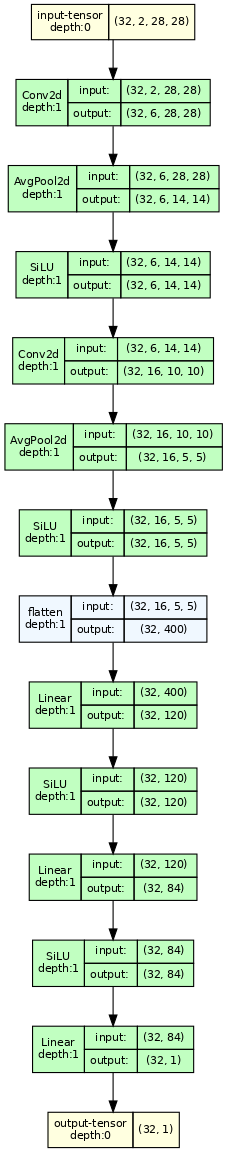

In [16]:
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')

height, width = 28, 28

# device='meta' -> no memory is consumed for visualization
model_graph = draw_graph(model, input_size=(batch_size, in_dim, height, width), device='meta')
model_graph.visual_graph

# Train

In [4]:
def get_model_dtype(model):
    return next(model.parameters()).dtype

In [5]:
model = model.to('cuda')
dtype = get_model_dtype(model)
losser = torch.nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(model.parameters())
total_losses = []
print(dtype)
num_epoch = 20

torch.float32


In [6]:
epoch_eval_losses = []
epoch_train_avg_loss = []
epoch_eval_accs = []
batch_losses = []
for epoch in range(num_epoch):
    epoch_train_losses = []
    for i, batch in enumerate(trainloader):
        samples, labels = batch
        samples = samples.to('cuda', dtype=dtype)
        labels = labels.to('cuda', dtype=dtype)
        pred = model(samples)
        loss = losser(pred.flatten(), labels)        
        optim.zero_grad()
        loss.backward()
        optim.step()
        epoch_train_losses.append(loss.item())
    #     if i > 2: break
    # break

    num_samples, correct, eval_loss = 0, 0, 0
    for batch in testloader:
        with torch.no_grad():
            samples, labels = batch
            samples = samples.to('cuda', dtype=dtype)
            labels = labels.to('cuda', dtype=dtype)
            model_output = model(samples)
            # pred = torch.argmax(model_output, dim=-1)
            pred = model_output > 0
            num_correct = torch.sum(pred.flatten() == labels)
            num_samples += pred.shape[0]
            correct += num_correct
            eval_loss += torch.nn.functional.binary_cross_entropy_with_logits(model_output.flatten(), labels, reduction='none').sum()

    batch_losses.extend(epoch_train_losses)
    epoch_train_avg_loss.append(np.mean(epoch_train_losses))

    epch_eval_loss = eval_loss/num_samples
    epoch_eval_acc = correct / num_samples
    epoch_eval_losses.append(epch_eval_loss.item())
    epoch_eval_accs.append(epoch_eval_acc.item())
    print(f'epoch {epoch}, train avg loss {np.mean(epoch_train_losses)}, eval loss {epch_eval_loss: .02f}, eval acc {epoch_eval_acc: .02f}')

epoch 0, train avg loss 0.6939370202761824, eval loss  0.69, eval acc  0.54
epoch 1, train avg loss 0.6601950305123483, eval loss  0.62, eval acc  0.66
epoch 2, train avg loss 0.5233434493182808, eval loss  0.63, eval acc  0.69
epoch 3, train avg loss 0.5020077933547318, eval loss  0.56, eval acc  0.73
epoch 4, train avg loss 0.47735695877382833, eval loss  0.54, eval acc  0.74
epoch 5, train avg loss 0.44831887656642544, eval loss  0.54, eval acc  0.75
epoch 6, train avg loss 0.43130629934290404, eval loss  0.57, eval acc  0.73
epoch 7, train avg loss 0.39952047265345053, eval loss  0.51, eval acc  0.75
epoch 8, train avg loss 0.3742276579141617, eval loss  0.50, eval acc  0.77
epoch 9, train avg loss 0.3409559021713913, eval loss  0.52, eval acc  0.79
epoch 10, train avg loss 0.31020844359231253, eval loss  0.56, eval acc  0.78
epoch 11, train avg loss 0.2915792216857274, eval loss  0.52, eval acc  0.78
epoch 12, train avg loss 0.2595576421027222, eval loss  0.56, eval acc  0.80
epoc

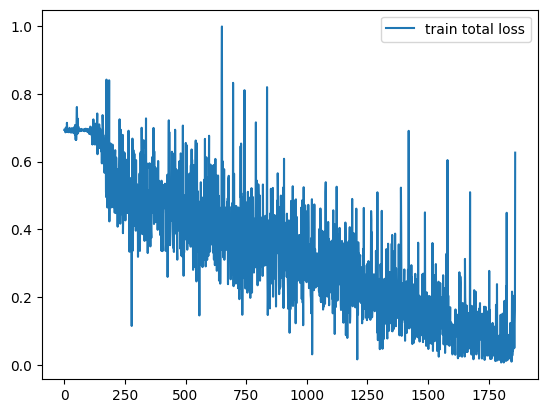

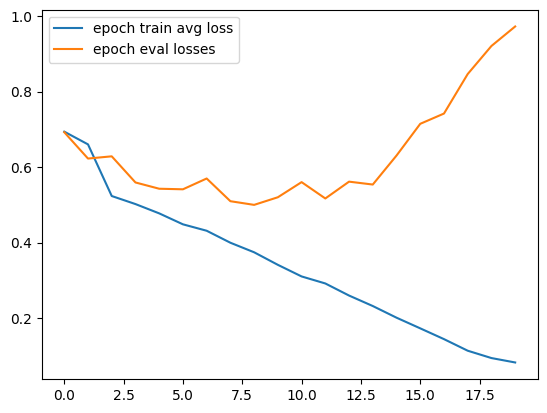

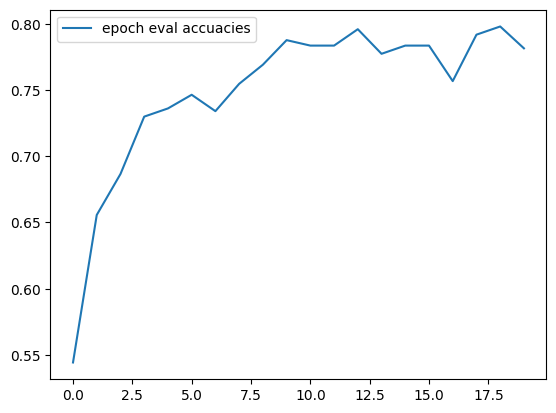

In [7]:
plt.plot(batch_losses, label='train total loss')
plt.legend()
plt.show()

plt.plot(epoch_train_avg_loss, label='epoch train avg loss')
plt.plot(epoch_eval_losses, label='epoch eval losses')
plt.legend()
plt.show()

plt.plot(epoch_eval_accs, label='epoch eval accuacies')
plt.legend()
plt.show()

# Some Visualization on the Task

In [8]:
from torchvision.transforms.functional import to_pil_image 
import einops
img_mean, img_std = 0.5, 0.5
imgs, img_labels = [], []
show_num = 12
for batch in testloader:
    with torch.no_grad():
        samples, labels = batch
        samples = samples.to('cuda', dtype=dtype)
        labels = labels.to('cuda', dtype=dtype)
        model_output = model(samples)
        model_output = model_output.flatten() > 0
        samples = samples * img_std + img_mean
        for i in range(show_num):
            sample = samples[i]
            label = model_output[i].item()
            sample = einops.rearrange(sample, 'p h w -> 1 h (p w)')
            img = to_pil_image(sample)
            # size = np.round(128 * np.array(img.size) / np.min(img.size)).astype(np.int32)
            # img = img.resize(size)
            imgs.append(img)
            img_labels.append(label)
        # pred = torch.argmax(model_output, dim=-1)
        pred = model_output > 0
    break

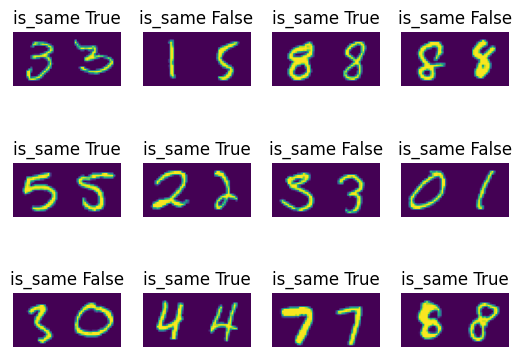

In [10]:
fig, axes = plt.subplots(show_num // 4, 4, )
axes =  axes.flatten()
for i in range(show_num):
    ax = axes[i]
    img = imgs[i]
    label = img_labels[i]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'is_same {label}')